In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


DATA CLEANING

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
temp = df.dropna()
temp

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
temp[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']] 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
temp[temp["gender"] == "other"]
temp2 = temp.drop(3116)
temp2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Check outliers

In [11]:
temp2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,37060.423594,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,20995.468407,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,18602.500000,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,37580.500000,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,55181.750000,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


BMI

Text(0.5, 1.0, 'BMI')

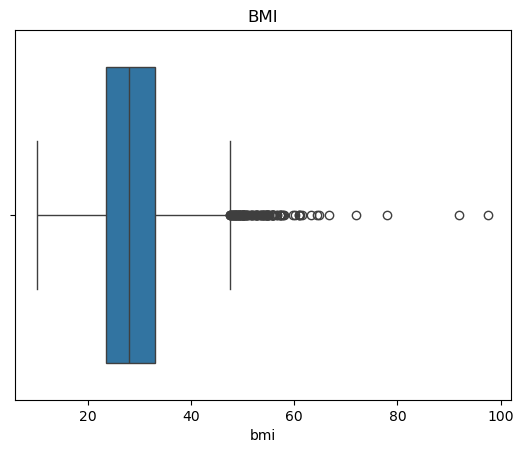

In [12]:
sns.boxplot(x = 'bmi', data = temp2).set_title("BMI")

In [13]:
variance = temp2['bmi'].var()
variance

61.690341298020755

In [14]:
std  = temp2['bmi'].std()
std

7.854319913144661

In [15]:
q1, q3 = np.percentile(temp2['bmi'], [25, 75])

In [16]:
q1

23.5

In [17]:
q3

33.1

In [18]:
iqr = q3-q1

In [19]:
iqr

9.600000000000001

In [20]:
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [21]:
lower_limit

9.099999999999998

In [22]:
upper_limit

47.5

Text(0.5, 1.0, 'BMI')

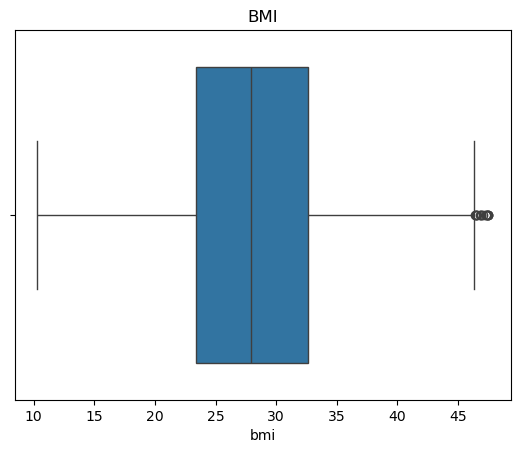

In [23]:
temp2.drop(temp2[temp2['bmi'] > upper_limit].index, inplace = True)
temp2.drop(temp2[temp2['bmi'] < lower_limit].index, inplace = True)
sns.boxplot(x = 'bmi', data = temp2).set_title("BMI")

In [24]:
variance1 = temp2['bmi'].var()
variance1

46.805173315040086

In [25]:
std1 = temp2['bmi'].std()
std1

6.841430648266493

GLUCOSE

Text(0.5, 1.0, 'Glucose')

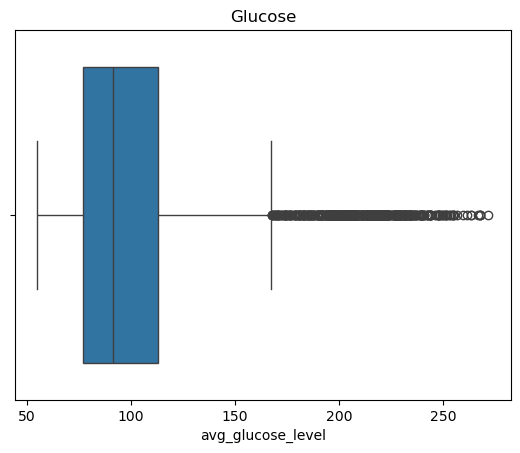

In [26]:
sns.boxplot(x = 'avg_glucose_level', data = temp2).set_title('Glucose')

In [27]:
Variance = temp2['avg_glucose_level'].var()
Variance

1939.5709624495762

In [28]:
Std = temp2['avg_glucose_level'].std()
Std

44.040560423881715

In [29]:
Q1, Q3 = np.percentile(temp2['avg_glucose_level'], [25, 75])

In [30]:
Q1

77.04

In [31]:
Q3

113.23249999999999

In [32]:
Iqr = Q3-Q1
Iqr

36.19249999999998

In [33]:
Lower_limit = Q1 - 1.5 * Iqr
Upper_limit = Q3 + 1.5 * Iqr

In [34]:
Lower_limit

22.751250000000034

In [35]:
Upper_limit

167.52124999999995

Text(0.5, 1.0, 'Glucose')

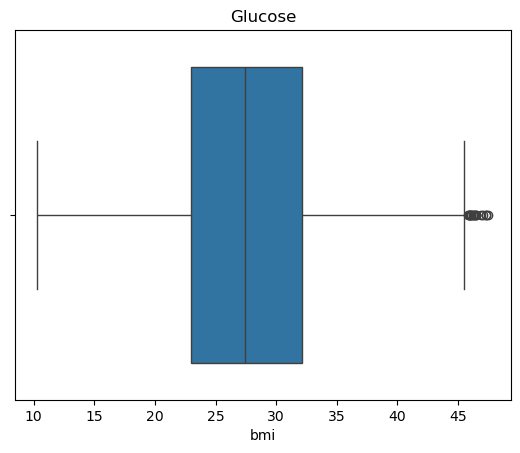

In [36]:
temp2.drop(temp2[temp2['avg_glucose_level']>Upper_limit].index, inplace = True)
temp2.drop(temp2[temp2['avg_glucose_level']<Lower_limit].index, inplace = True)
sns.boxplot(x = 'bmi', data = temp2).set_title('Glucose')

In [37]:
Variance1 = temp2['avg_glucose_level'].var()
Variance1

510.4603424208262

In [38]:
Std1 = temp2['avg_glucose_level'].std()
Std1

22.59336943487682

In [39]:
temp2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,37111.350881,40.597274,0.068390,0.036428,91.431861,27.817086,0.031962
std,20975.692978,22.438398,0.252444,0.187374,22.593369,6.722424,0.175921
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18675.500000,22.000000,0.000000,0.000000,75.055000,23.000000,0.000000
50%,37631.000000,41.000000,0.000000,0.000000,88.040000,27.400000,0.000000
75%,55326.000000,58.000000,0.000000,0.000000,104.025000,32.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,167.410000,47.500000,1.000000


In [40]:
temp2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
temp3 = temp2
temp3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
temp3['stroke'].value_counts()

stroke
0    4119
1     136
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24ce6651c70>,
 [Text(1.0944591522114897, 0.1102685999752755, 'Stroke'),
  Text(-1.0944591509209782, -0.11026861278410788, 'Not Stroke')],
 [Text(0.5969777193880853, 0.06014650907742299, '3.2%'),
  Text(-0.5969777186841698, -0.06014651606405884, '96.8%')])

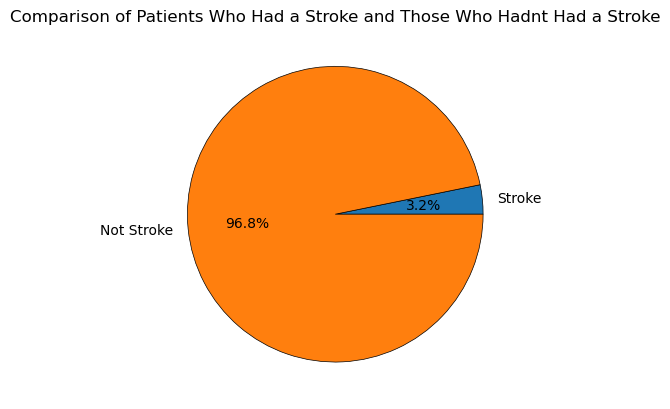

In [43]:
plt.title('Comparison of Patients Who Had a Stroke and Those Who Hadnt Had a Stroke')

plt.style.use('bmh')
labels = ('Stroke', 'Not Stroke')
slices = [136, 4119]
colors = ['orange', 'skyblue']
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')

Risk factors for stroke due to disease

HyperTension

In [44]:
Hyp = temp3[(temp3['hypertension'] == 1) & (temp3['stroke'] == 1)]
hypertension = temp3[(temp3['hypertension'] == 1)]
hyp = hypertension.groupby(['hypertension', 'stroke', 'gender'])['stroke'].count()
hyp

hypertension  stroke  gender
1             0       Female    140
                      Male      119
              1       Female     24
                      Male        8
Name: stroke, dtype: int64

<Axes: xlabel='hypertension,stroke,gender'>

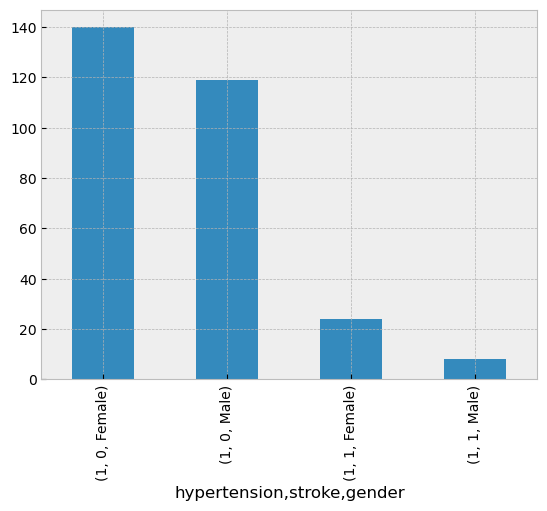

In [45]:
hyp.plot(kind = 'bar')

<Axes: xlabel='gender', ylabel='hypertension'>

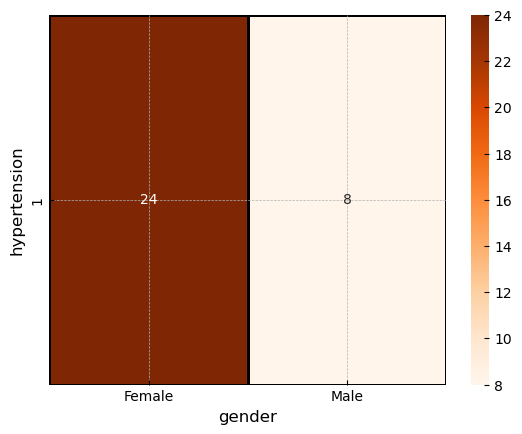

In [46]:
temp1_sns = (Hyp.groupby('hypertension').gender.value_counts().unstack().fillna(0))
sns.heatmap(temp1_sns, cmap = 'Oranges', annot = True, linewidth = 1, linecolor = 'Black')

Diabetes

In [47]:
diabetes = temp3[(temp3['avg_glucose_level']>=140) & (temp3['stroke'] == 1)]
diabetes.groupby(['avg_glucose_level', 'stroke', 'gender'])['stroke'].value_counts()
Diabetes = diabetes['gender'].value_counts()
Diabetes

gender
Male      5
Female    2
Name: count, dtype: int64

<Axes: xlabel='gender'>

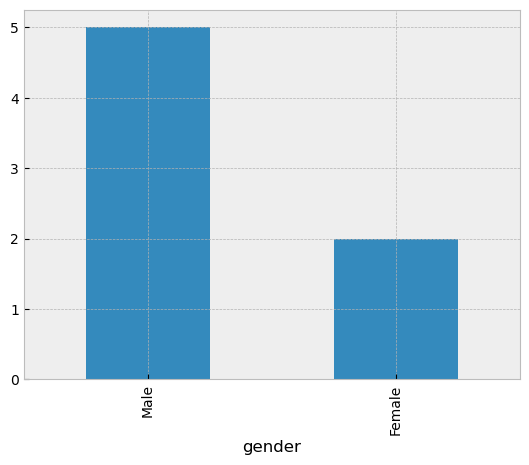

In [48]:
Diabetes.plot(kind = 'bar')

<Axes: xlabel='gender', ylabel='avg_glucose_level'>

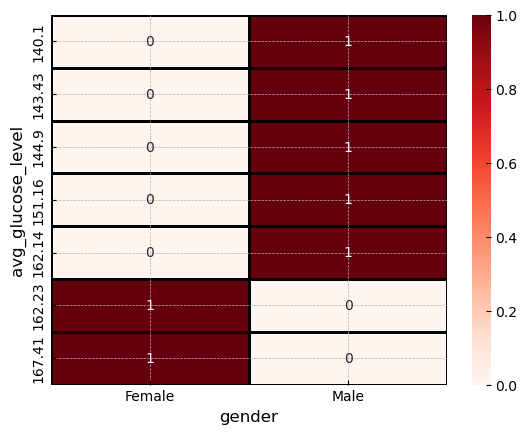

In [49]:
temp2_sns = (diabetes.groupby('avg_glucose_level').gender.value_counts().unstack().fillna(0))
sns.heatmap(temp2_sns, cmap = 'Reds', annot = True, linewidth = 2, linecolor = 'Black')

Heart Attack

In [50]:
HEART = temp3[(temp3['heart_disease'] == 1) & (temp3['stroke'] == 1)]
heart = temp3[(temp3['heart_disease'] == 1)]
Heart = heart.groupby(['heart_disease', 'stroke', 'gender'])['stroke'].count()
Heart

heart_disease  stroke  gender
1              0       Female    51
                       Male      86
               1       Female     7
                       Male      11
Name: stroke, dtype: int64

<Axes: xlabel='heart_disease,stroke,gender'>

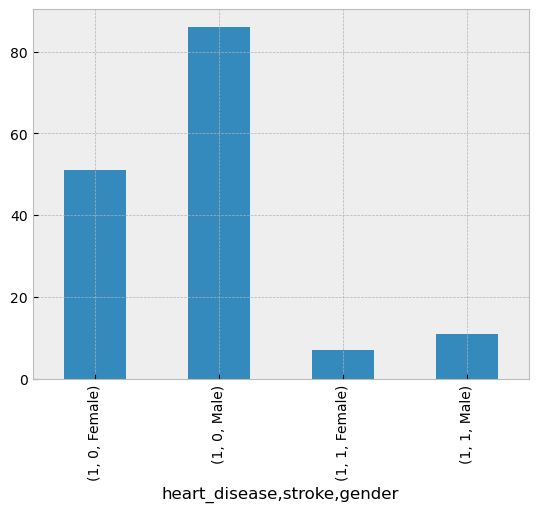

In [51]:
Heart.plot(kind = 'bar')

<Axes: xlabel='gender', ylabel='heart_disease'>

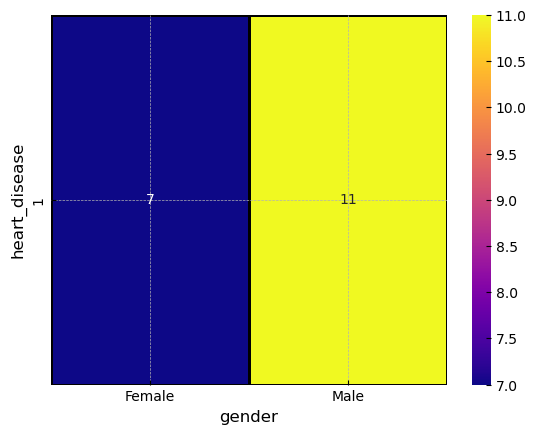

In [52]:
temp4_sns = (HEART.groupby('heart_disease').gender.value_counts().unstack().fillna(0))
sns.heatmap(temp4_sns, cmap = 'plasma', annot = True, linewidth = 2, linecolor = 'Black')

Obesity

In [53]:
bmi = temp3[(temp3['bmi']>= 25) & (temp3['stroke'] == 1)]
bmi.groupby(['bmi', 'stroke', 'gender'])['stroke'].value_counts()
BMI = bmi['gender'].value_counts()
BMI

gender
Female    58
Male      46
Name: count, dtype: int64

<Axes: title={'center': 'BMI'}, xlabel='gender'>

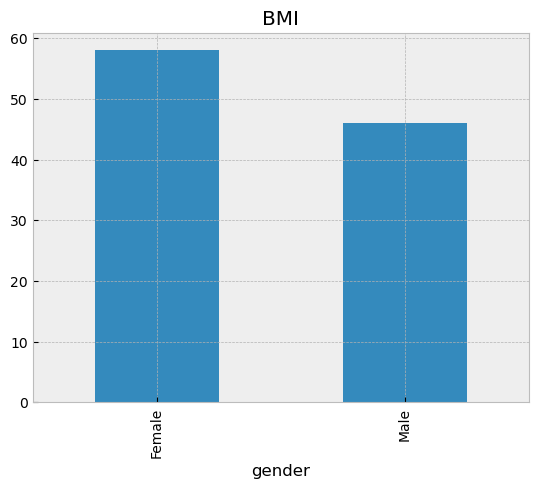

In [54]:
BMI.plot(kind = 'bar', title = 'BMI')

<Axes: xlabel='gender', ylabel='bmi'>

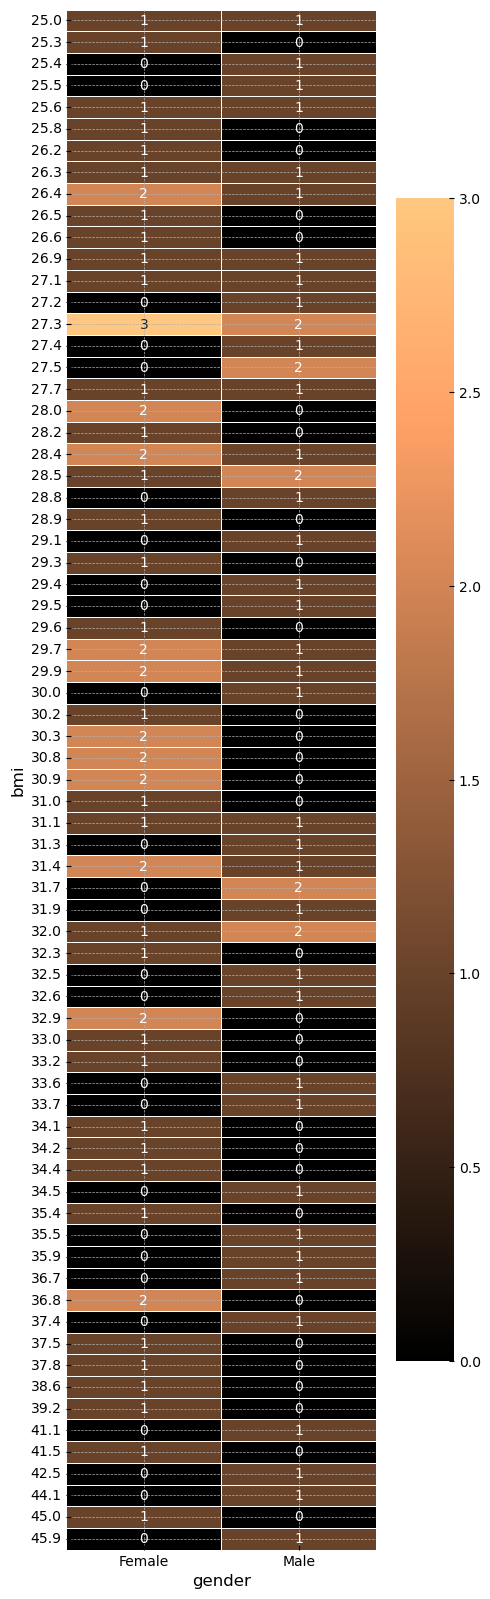

In [55]:
temp5_sns = (bmi.groupby('bmi').gender.value_counts().unstack().fillna(0))
plt.subplots(figsize = (5, 20))
sns.heatmap(temp5_sns, cmap = 'copper', annot = True, linewidth = 0.5, linecolor = 'white')

Text(0, 0.5, 'Frequency')

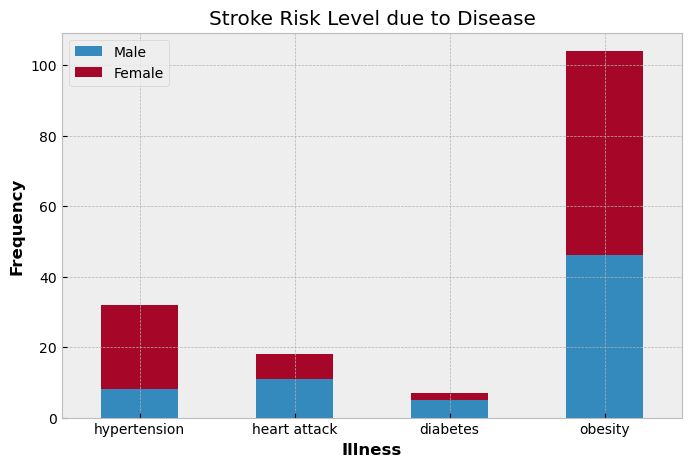

In [56]:
Male = [8, 11, 5, 46]
Female = [24, 7, 2, 58]

index = ['hypertension','heart attack','diabetes','obesity']

df = pd.DataFrame({'Male': Male, 'Female': Female}, index = index)

ax = df.plot.bar(rot=0, figsize = (8, 5), title = "Stroke Risk Level due to Disease", stacked = True )
ax.set_xlabel("Illness", fontweight = 'bold')
ax.set_ylabel("Frequency", fontweight = 'bold')

Stroke Risk Factors due to Type of Residence

In [57]:
unknown = temp3[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
unknown.drop(unknown[unknown['smoking_status'] == 'Unknown'].index, inplace = True)
unknown

C:\Users\Ds_Lab_18\AppData\Local\Temp\ipykernel_4148\2310037327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown.drop(unknown[unknown['smoking_status'] == 'Unknown'].index, inplace = True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [58]:
residence= temp3[(temp3['stroke'] == 1)]
res = residence.groupby(['Residence_type', 'gender'])['stroke'].count()
res

Residence_type  gender
Rural           Female    41
                Male      26
Urban           Female    41
                Male      28
Name: stroke, dtype: int64

([<matplotlib.patches.Wedge at 0x24ce8235400>,
 [Text(0.025407705044643906, 1.099706528363074, 'Rural'),
  Text(-0.025407705044643555, -1.099706528363074, 'Urban')],
 [Text(0.013858748206169403, 0.5998399245616767, '49.3%'),
  Text(-0.01385874820616921, -0.5998399245616767, '50.7%')])

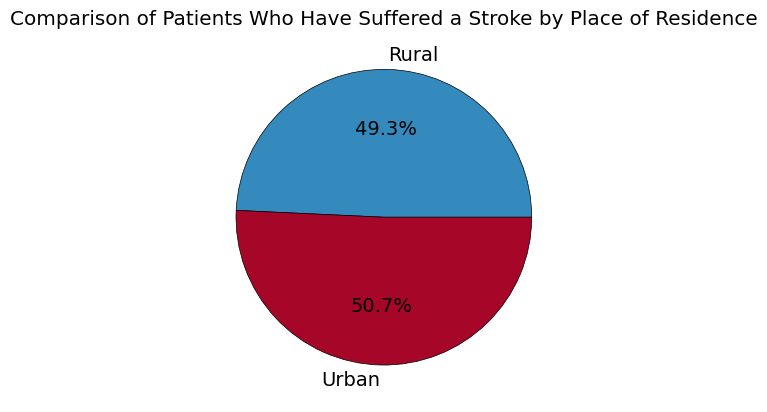

In [59]:
plt.title('Comparison of Patients Who Have Suffered a Stroke by Place of Residence')
plt.style.use("fivethirtyeight")
labels = ('Rural', 'Urban')
slices = [67, 69]
colors = ['charcoal', 'blue']
plt.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'black'}, autopct = '%1.1f%%')

 Risk Factors for Stroke due to Lifestyle

In [60]:
smoke_status = unknown[(unknown['stroke'] == 1)]
smoke = smoke_status.groupby(['smoking_status'])['stroke'].count()
smoke

smoking_status
formerly smoked    36
never smoked       54
smokes             24
Name: stroke, dtype: int64

<Axes: xlabel='smoking_status'>

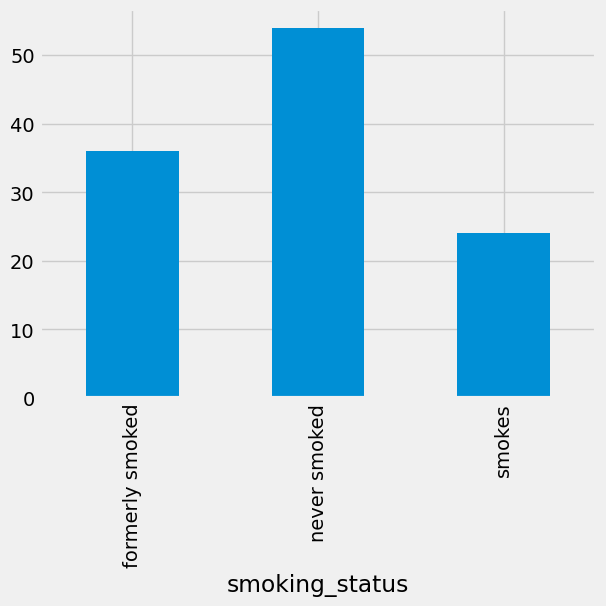

In [61]:
smoke.plot(kind = 'bar')

<Axes: xlabel='gender', ylabel='smoking_status'>

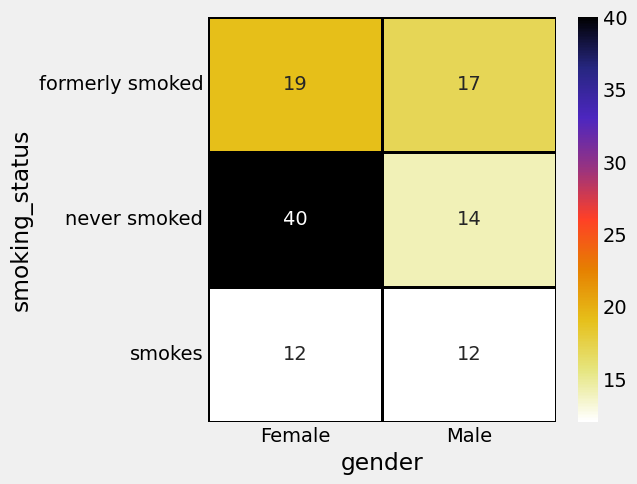

In [62]:
temp6_sns = (smoke_status.groupby('smoking_status').gender.value_counts().unstack().fillna(0))
plt.subplots(figsize = (5, 5)) 
sns.heatmap(temp6_sns, cmap = 'CMRmap_r', annot = True, linewidth = 1, linecolor = 'Black')

In [63]:
work = temp3[(temp3['stroke'] == 1)]
work.groupby(['work_type', 'stroke', 'gender'])['stroke'].count()

work_type      stroke  gender
Govt_job       1       Female    13
                       Male       5
Private        1       Female    43
                       Male      35
Self-employed  1       Female    25
                       Male      14
children       1       Female     1
Name: stroke, dtype: int64

Text(0, 0.5, 'Frequency')

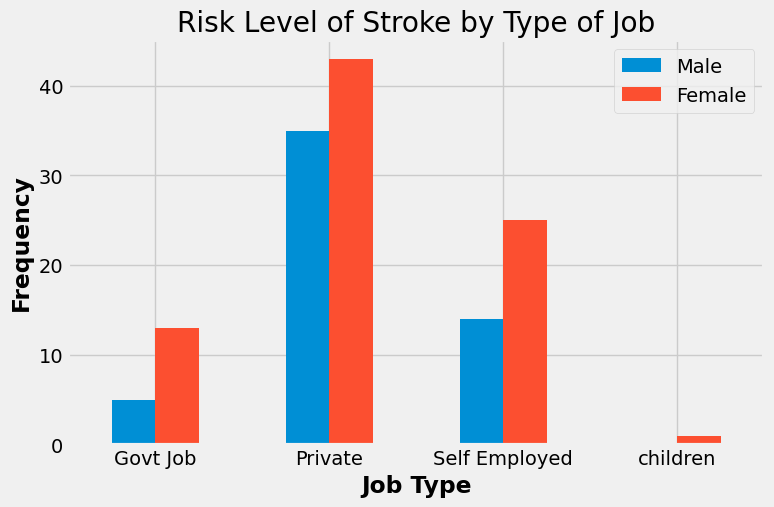

In [64]:
Male = [5, 35, 14, 0]
Female = [13, 43, 25, 1]

index = ['Govt Job', 'Private', 'Self Employed', 'children']

df = pd.DataFrame({'Male': Male, 'Female': Female}, index = index)

ax = df.plot.bar(rot = 0, figsize = (8, 5), title = "Risk Level of Stroke by Type of Job")
ax.set_xlabel("Job Type", fontweight = 'bold')
ax.set_ylabel("Frequency", fontweight = 'bold')

Risk Factors for Stroke due to Age

In [65]:
age = temp3[(temp3['stroke'] == 1)]
Age = age.groupby('age').agg({"stroke" : 'count'})
Age

,stroke
age,
14.0,1
32.0,1
38.0,1
39.0,3
42.0,1
43.0,1
45.0,2
46.0,1
47.0,1


<Axes: title={'center': 'Age Factors that can cause Stroke'}, ylabel='age'>

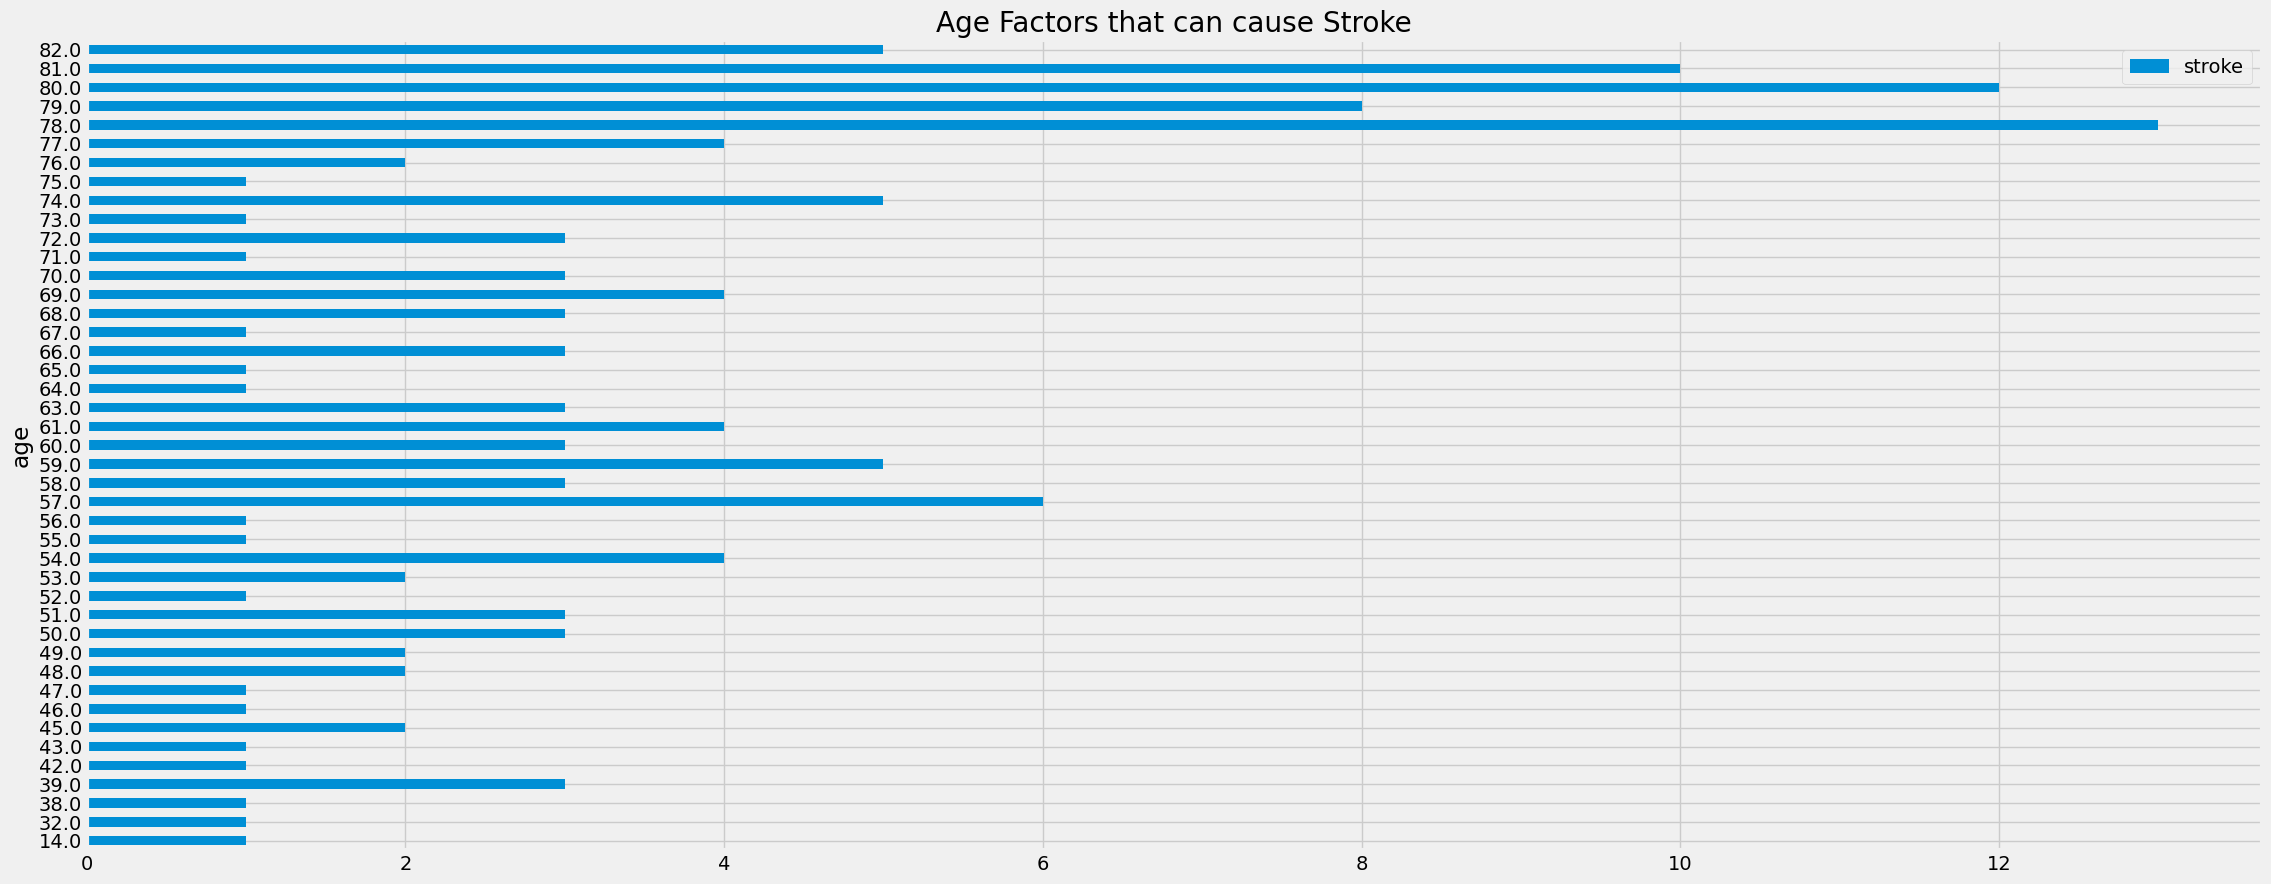

In [68]:
Age.plot.barh(rot=0, figsize=(25, 10), title = "Age Factors that can cause Stroke")

<Axes: xlabel='gender', ylabel='age'>

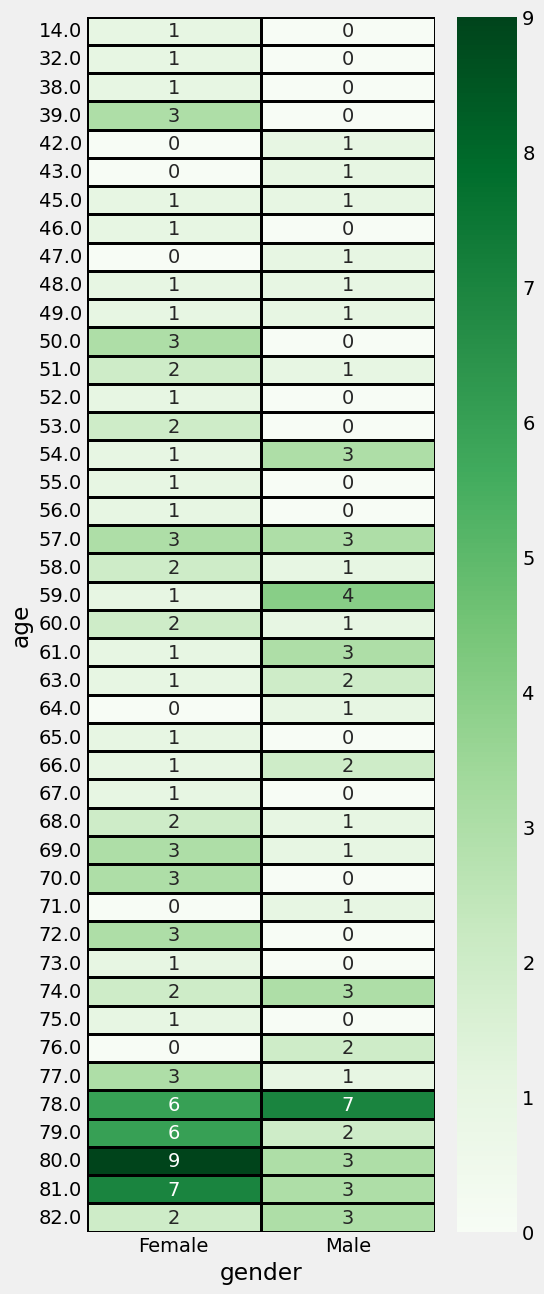

In [69]:
temp3_sns = (age.groupby('age').gender.value_counts().unstack().fillna(0))
plt.subplots(figsize = (5, 15))
sns.heatmap(temp3_sns, cmap = 'Greens', annot = True, linewidth = 1, linecolor = 'Black')

Risk Factors for Stroke due to Gender

<Axes: title={'center': 'The more dominant gender affected by stroke'}, xlabel='gender,stroke'>

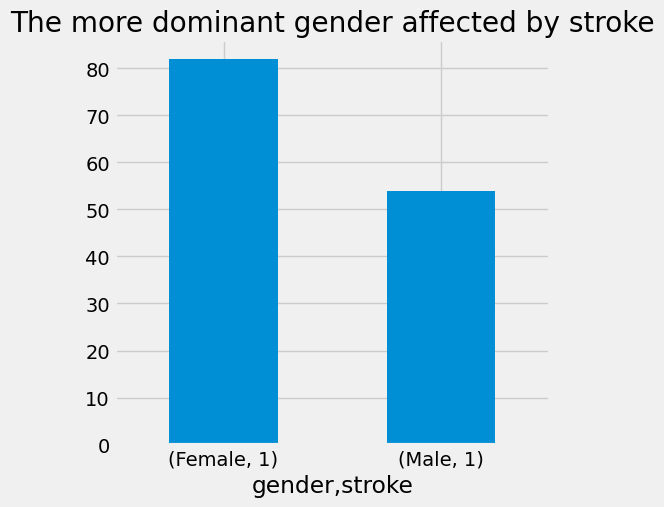

In [70]:
gender = temp3[(temp3['stroke'] == 1)]
x = gender.groupby(['gender'])['stroke'].value_counts()
x.plot.bar(rot=0, figsize=(5,5), title = "The more dominant gender affected by stroke")

In [72]:
x = temp3[temp3["stroke"] == 1]
pd.set_option("display.max_row", None)
x['age'].value_counts()

age
78.0    13
80.0    12
81.0    10
79.0     8
57.0     6
74.0     5
59.0     5
82.0     5
69.0     4
61.0     4
54.0     4
77.0     4
70.0     3
68.0     3
39.0     3
66.0     3
58.0     3
72.0     3
63.0     3
51.0     3
60.0     3
50.0     3
53.0     2
45.0     2
76.0     2
49.0     2
48.0     2
56.0     1
14.0     1
73.0     1
71.0     1
65.0     1
32.0     1
46.0     1
38.0     1
55.0     1
52.0     1
42.0     1
64.0     1
47.0     1
67.0     1
43.0     1
75.0     1
Name: count, dtype: int64

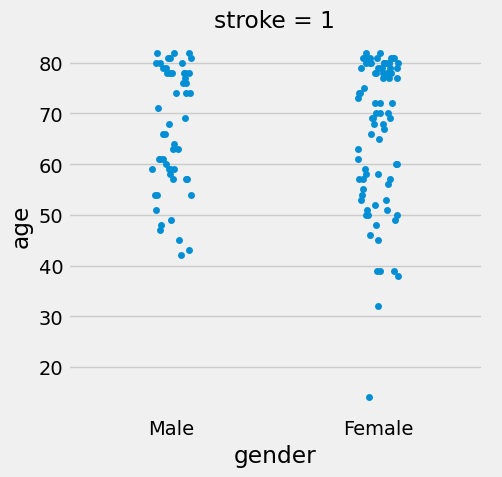

In [74]:
sns.catplot(x='gender', y='age', col='stroke', data=x)
plt.show()